In [1]:
import pandas as pd

In [2]:
import os
os.getcwd() 

'C:\\Users\\alekh\\OneDrive\\Desktop\\jupyter'

In [3]:
data = pd.read_csv(r"C:\Users\alekh\OneDrive\Desktop\jupyter\Dataset .csv")

In [4]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
# Analyze the text reviews to identify the most common positive and negative keywords

# Get the counts of each unique value in the 'rating text' column

keyword_counts = data['Rating text'].value_counts()

# Convert to DataFrame for easier visualization

keyword_counts_df = keyword_counts.reset_index()
keyword_counts_df.columns = ['Keyword', 'Count']

# Display the result

print(keyword_counts_df)



     Keyword  Count
0    Average   3737
1  Not rated   2148
2       Good   2100
3  Very Good   1079
4  Excellent    301
5       Poor    186


Overall Average Review Length: 7.02 characters
  Rating text  Average Review Length
0     Average                    7.0
1   Excellent                    9.0
2        Good                    4.0
3   Not rated                    9.0
4        Poor                    4.0
5   Very Good                    9.0


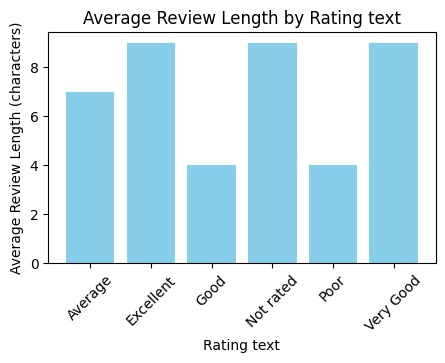

In [6]:
#Calculate the average length of reviews and explore if there is a relationship between review length and rating


# Step 1: Create a new column for review length

data['review_length'] = data['Rating text'].str.len()

# Step 2: Calculate the overall average review length

average_review_length = data['review_length'].mean()
print(f"Overall Average Review Length: {average_review_length:.2f} characters")

# Step 3: Calculate the average review length by rating category

average_length_by_rating = data.groupby('Rating text')['review_length'].mean().reset_index()
average_length_by_rating.columns = ['Rating text', 'Average Review Length']

# Display the result

print(average_length_by_rating)

# Optional: Visualize the relationship

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.bar(average_length_by_rating['Rating text'], average_length_by_rating['Average Review Length'], color='skyblue')
plt.xlabel('Rating text')
plt.ylabel('Average Review Length (characters)')
plt.title('Average Review Length by Rating text')
plt.xticks(rotation=45)
plt.show()







In [7]:
#Identify the restaurants with the highest and lowest number of votes

# Restaurant with the highest number of votes

highest_votes = data.loc[data['Votes'].idxmax(), ['Restaurant Name', 'Votes']]
print("Restaurant with the highest number of votes:")
print(highest_votes)

# Restaurant with the lowest number of votes

lowest_votes = data.loc[data['Votes'].idxmin(), ['Restaurant Name', 'Votes']]
print("\nRestaurant with the lowest number of votes:")
print(lowest_votes)


Restaurant with the highest number of votes:
Restaurant Name     Toit
Votes              10934
Name: 728, dtype: object

Restaurant with the lowest number of votes:
Restaurant Name    Cantinho da Gula
Votes                             0
Name: 69, dtype: object


In [8]:
# Analyze if there is a correlation between the number of votes and the rating of a restaurant


# Calculate the correlation between Votes and Aggregate rating

correlation = data['Votes'].corr(data['Aggregate rating'])
print(f"Correlation between Votes and Aggregate rating: {correlation:.2f}")


Correlation between Votes and Aggregate rating: 0.31


In [9]:
# Analyze if there is a relationship between the price range and the availability of online delivery and table booking.


print(data['Has Online delivery'].value_counts())
print(data['Has Table booking'].value_counts())


Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64
Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64


In [10]:
# Group by both columns and calculate the mean price range for each combination

grouped_data = data.groupby(['Has Online delivery', 'Has Table booking'])['Price range'].mean()

# Display the result

print(grouped_data)


Has Online delivery  Has Table booking
No                   No                   1.604673
                     Yes                  3.163209
Yes                  No                   1.735119
                     Yes                  2.804598
Name: Price range, dtype: float64


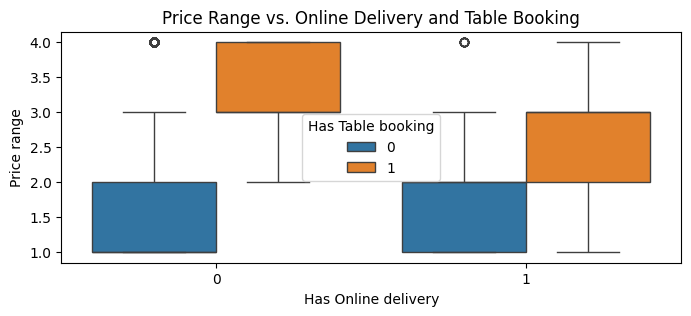

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Price range by Has Online delivery and Has Table booking

plt.figure(figsize=(8, 3))
sns.boxplot(data=data, x='Has Online delivery', y='Price range', hue='Has Table booking')
plt.title('Price Range vs. Online Delivery and Table Booking')
plt.show()



In [14]:
# Determine if higher-priced restaurants are more likely to offer these services


# Replace 'Yes' with 1 and 'No' with 0
data[['Has Online delivery', 'Has Table booking']] = data[['Has Online delivery', 'Has Table booking']].replace({'Yes': 1, 'No': 0}).astype(int)

# Group by 'price range' and calculate the mean (proportion) of 'Has Online delivery' and 'Has Table booking'
service_proportion = data.groupby('Price range')[['Has Online delivery', 'Has Table booking']].mean()


# Display the result
print(service_proportion)


             Has Online delivery  Has Table booking
Price range                                        
1                       0.157741           0.000225
2                       0.413106           0.076775
3                       0.291903           0.457386
4                       0.090444           0.467577


C:\Users\alekh\AppData\Local\Temp\ipykernel_5488\881038148.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[['Has Online delivery', 'Has Table booking']] = data[['Has Online delivery', 'Has Table booking']].replace({'Yes': 1, 'No': 0}).astype(int)
